In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
data = pd.read_csv('mbti_1.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
#remove ||| from the posts 
def removePostMark(text): 
    text = re.sub('[|||]','',text)
    return text

In [5]:
data['clean'] = [re.sub('[|||]','',post) for post in data['posts']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Possible set union at position 2
  """Entry point for launching an IPython kernel.


In [6]:
data.head()

,type,posts,clean
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'http://www.youtube.com/watch?v=qsXHcwe3krwhtt...
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired.That's another silly misconcepti...


In [7]:
sw = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", " ", text)
    text = text.replace('like','')
    text = text.replace('dont','')
    text = text.replace('think','')
    text = text.replace('people','')
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in sw]
    return text

In [8]:
data['clean2']=data['clean'].apply(lambda x: clean_text(x))

In [9]:
data.head()

,type,posts,clean,clean2
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'http://www.youtube.com/watch?v=qsXHcwe3krwhtt...,"[intj, moments, sportscenter, top, ten, plays,..."
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,"[im, finding, lack, posts, alarmingsex, boring..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,'Good one _____ https://www.youtube.com/wat...,"[good, one, course, say, know, thats, blessing..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...","[dear, intp, enjoyed, conversation, day, esote..."
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired.That's another silly misconcepti...,"[youre, firedthats, another, silly, misconcept..."


In [10]:
#create columns for individual letters 
for index, row in data.iterrows(): 
    mbti_type = list(row['type'])
    data.loc[index,'IorE']=mbti_type[0]
    data.loc[index,'SorN']=mbti_type[1]
    data.loc[index,'TorF']=mbti_type[2]
    data.loc[index,'PorJ']=mbti_type[3]

In [11]:
data.head()

,type,posts,clean,clean2,IorE,SorN,TorF,PorJ
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,'http://www.youtube.com/watch?v=qsXHcwe3krwhtt...,"[intj, moments, sportscenter, top, ten, plays,...",I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,"[im, finding, lack, posts, alarmingsex, boring...",E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,'Good one _____ https://www.youtube.com/wat...,"[good, one, course, say, know, thats, blessing...",I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...","[dear, intp, enjoyed, conversation, day, esote...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired.That's another silly misconcepti...,"[youre, firedthats, another, silly, misconcept...",E,N,T,J


In [12]:
def getWordFreq(df, column, letter): 
    df2 = df[df[column]==letter]
    df2.reset_index(inplace = True)
    all_Ewords=[]        
    for i in range(len(df2)):
        all_Ewords = all_Ewords + df['clean2'][i]
    nlp_words = nltk.FreqDist(all_Ewords)
    return nlp_words

In [13]:
e_words = getWordFreq(data, 'IorE', 'E')
i_words = getWordFreq(data, 'IorE', 'I')

In [14]:
s_words = getWordFreq(data, 'SorN', 'S')
n_words = getWordFreq(data, 'SorN', 'N')

In [15]:
t_words = getWordFreq(data, 'TorF', 'T')
f_words = getWordFreq(data, 'TorF', 'F')

In [16]:
p_words = getWordFreq(data, 'PorJ', 'P')
j_words = getWordFreq(data, 'PorJ', 'J')

In [170]:
#Function to get top ten common words from each word frequency counts 
def getttcw(nltkFreqDF):
  dff = pd.DataFrame.from_dict(nltkFreqDF, orient='index')
  dff.columns=['Frequency']
  dff.reset_index(inplace=True)
  dff= dff.sort_values(by=['Frequency'], ascending = False)
  ttcw = dff['index'].tolist()[0:55]
  return ttcw 

In [171]:
commonWords = getttcw(e_words)
commonWords.extend(getttcw(i_words))
commonWords.extend(getttcw(s_words))
commonWords.extend(getttcw(n_words))
commonWords.extend(getttcw(f_words))
commonWords.extend(getttcw(t_words))
commonWords.extend(getttcw(p_words))
commonWords.extend(getttcw(j_words))

In [172]:
commonWords = [i for i in set(commonWords) if commonWords.count(i) > 1]

In [174]:
def dForWC(mbti_words, cwlist):
  mbti_df = pd.DataFrame.from_dict(mbti_words, orient = 'index')
  mbti_df.columns=['Frequency']
  mbti_df.reset_index(inplace=True)
  mbti_df= mbti_df.sort_values(by=['Frequency'], ascending = False)
  mbti_df = mbti_df[mbti_df['index'].isin(cwlist) == False]
  mbti_df = mbti_df.set_index('index').to_dict()['Frequency']
  return mbti_df

In [175]:
from wordcloud import WordCloud

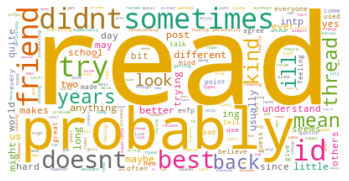

In [195]:
wc = WordCloud(stopwords=sw, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wcloud = wc.generate_from_frequencies(dForWC(e_words, commonWords))
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()
wcloud.to_file('e_wc.png')

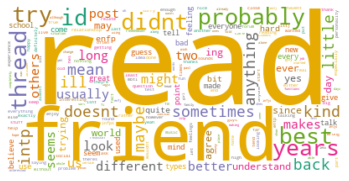

In [196]:
wc = WordCloud(stopwords=sw, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wcloud = wc.generate_from_frequencies(dForWC(i_words, commonWords))
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()
wcloud.to_file('i_wc.png')

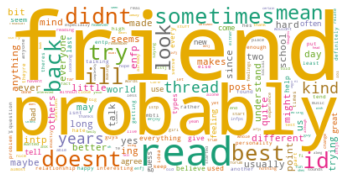

In [197]:
wc = WordCloud(stopwords=sw, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wcloud = wc.generate_from_frequencies(dForWC(s_words, commonWords))
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()
wcloud.to_file('s_wc.png')

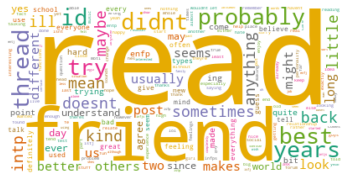

In [198]:
wc = WordCloud(stopwords=sw, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wcloud = wc.generate_from_frequencies(dForWC(n_words, commonWords))
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()
wcloud.to_file('n_wc.png')

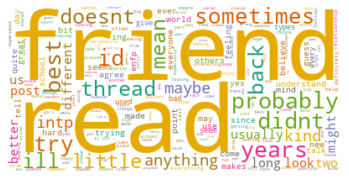

In [200]:
wc = WordCloud(stopwords=sw, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wcloud = wc.generate_from_frequencies(dForWC(f_words, commonWords))
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()
wcloud.to_file('f_wc.png')

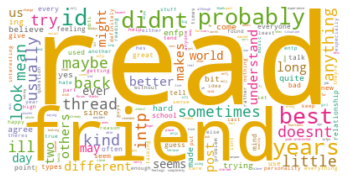

In [201]:
wc = WordCloud(stopwords=sw, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wcloud = wc.generate_from_frequencies(dForWC(t_words, commonWords))
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()
wcloud.to_file('t_wc.png')

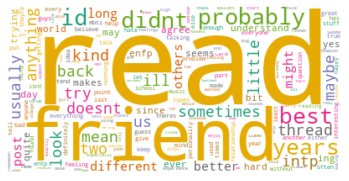

In [202]:
wc = WordCloud(stopwords=sw, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wcloud = wc.generate_from_frequencies(dForWC(p_words, commonWords))
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()
wcloud.to_file('p_wc.png')

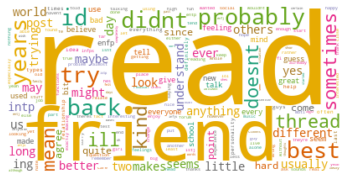

In [203]:
wc = WordCloud(stopwords=sw, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wcloud = wc.generate_from_frequencies(dForWC(j_words, commonWords))
plt.imshow(wcloud,interpolation='bilinear')
plt.axis('off')
(-0.5, 399.5, 199.5, -0.5)
plt.show()
wcloud.to_file('j_wc.png')